In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

##### Project 2

##### Using datasets from the U.S. Department of Education and labor market statistics, I will analyze the trends in computer science graduates from 1970 to 2023 and compare them with the growth in the number of jobs in the technology sector. This analysis will explore the relationship between the supply of graduates and the demand for tech professionals over time.

Hypothesis: The rapid growth of the tech industry in recent decades has created a surge in demand for computer science graduates. However, fluctuations in the number of graduates may not align perfectly with actual job postings / increase.

##### Firstly, I import the first dataset with  Bachelor's degrees conferred by postsecondary institutions, by field of study; Academic years, 1970-71 through 2021-22

This dataset provides the foundation for understanding trends in computer science graduates over a long period. By analyzing these trends, we can assess how well the education system responds to changes in industry demand.

In [2]:
import pandas as pd

##### In this section, I also import a dataset that contains data on Bachelor's degrees conferred by postsecondary institutions across various fields of study, spanning academic years from 1970–71 to 2021–22. Using the pandas library in Python, I load the dataset and filter it to only include rows corresponding to computer science graduates. 

In [3]:
CS_Graduate = pd.read_excel('tabn322.10.xlsx', skiprows=11)
CS_Graduate.head()

,Computer and information sciences and support \n services,2388,5652,15121,42337,25159,24506,44142,47702,50961,55271,59586,64402,71416,79597,88638,97054,104883,108503
0,Education,176307.0,154437.0,108074.0,87147.0,110807.0,105384.0,105458.0,107235.0,104698.0,98838.0,91596.0,87221.0,85130.0,82599.0,83952.0,85052.0,89477.0,89410.0
1,Engineering,45034.0,38733.0,63642.0,77391.0,62448.0,62168.0,58209.0,66841.0,85987.0,92169.0,97852.0,106789.0,115671.0,121953.0,126692.0,128337.0,126042.0,123017.0
2,Engineering technologies\3\,5148.0,7943.0,11713.0,19731.0,17303.0,15829.0,14660.0,14565.0,17010.0,16807.0,17253.0,17159.0,18119.0,18728.0,19620.0,19788.0,19004.0,18405.0
3,English language and literature/letters,63914.0,41452.0,31922.0,34083.0,51064.0,49928.0,50569.0,55094.0,52401.0,50464.0,45851.0,42797.0,41314.0,40002.0,39344.0,38049.0,35764.0,33429.0
4,Family and consumer sciences/human sciences,11167.0,17409.0,18370.0,13847.0,13920.0,14353.0,16421.0,20775.0,23930.0,24689.0,24584.0,25389.0,25080.0,24357.0,23956.0,23248.0,22319.0,20630.0


##### After loading the dataset and previewing its structure using head(), I proceed to handle the column headers representing years.

In [4]:
Years = pd.read_excel('tabn322.10.xlsx', skiprows=1)
Years.head()

,Field of study,1970-71,1975-76,1980-81,1985-86,1990-91,1995-96,2000-01,2005-06,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
0,1,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0
1,Total,839730.0,925746.0,935140.0,987823.0,1094538.0,1164792.0,1244171.0,1485104.0,1840381.0,1870150.0,1894969.0,1920750.0,1956114.0,1980665.0,2013086.0,2038682.0,2066463.0,2015035.0
2,Agriculture and natural resources\1\,12674.0,19402.0,21886.0,17191.0,13363.0,21757.0,23766.0,23497.0,34304.0,35953.0,37028.0,37827.0,38782.0,40334.0,41373.0,41858.0,41921.0,40675.0
3,Architecture and related services,5570.0,9146.0,9455.0,9119.0,9781.0,8352.0,8480.0,9515.0,9757.0,9149.0,9090.0,8825.0,8579.0,8464.0,8806.0,9045.0,9296.0,9462.0
4,"Area, ethnic, cultural, gender, and group studies",2579.0,3577.0,2887.0,3021.0,4776.0,5633.0,6160.0,7878.0,8850.0,8275.0,7783.0,7840.0,7720.0,7717.0,7733.0,7771.0,7390.0,6658.0


##### To prepare the data for analysis, I first isolate the columns corresponding to the years, omitting the first column that contains field names. By converting the years into a list format, I ensure consistency and compatibility for plotting and further data manipulation. Additionally, I extract the row of data corresponding to computer science graduates (excluding the field name column) to create a clean subset for visualization and trend analysis. Finally, I print the results to verify that the data has been properly prepared for the next steps."

In [5]:
years = Years.columns[1:]  

cs_graduates = CS_Graduate.columns[1:] 

years = years.tolist()

print("Years:", years)
print("CS Graduates:", cs_graduates)

Years: ['1970-71', '1975-76', '1980-81', '1985-86', '1990-91', '1995-96', '2000-01', '2005-06', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
CS Graduates: Index([  2388,   5652,  15121,  42337,  25159,  24506,  44142,  47702,  50961,
        55271,  59586,  64402,  71416,  79597,  88638,  97054, 104883, 108503],
      dtype='object')


##### To visualize the trends in the number of computer science graduates over time, I created a line plot using Matplotlib. I used the years as the x-axis and the corresponding number of graduates as the y-axis. The graph is styled with markers to highlight each data point, and a cyan color scheme is used to distinguish the line. 

I also added a title and labeled the axes to provide context, ensuring the plot is easy to interpret. Gridlines and rotated x-axis labels improve readability, while tight_layout() ensures the elements fit neatly. This visualization effectively captures the growth in computer science graduates from 1970 to 2022.



By visualizing the trends, I aim to uncover patterns or anomalies in graduation rates and correlate them with industry developments.

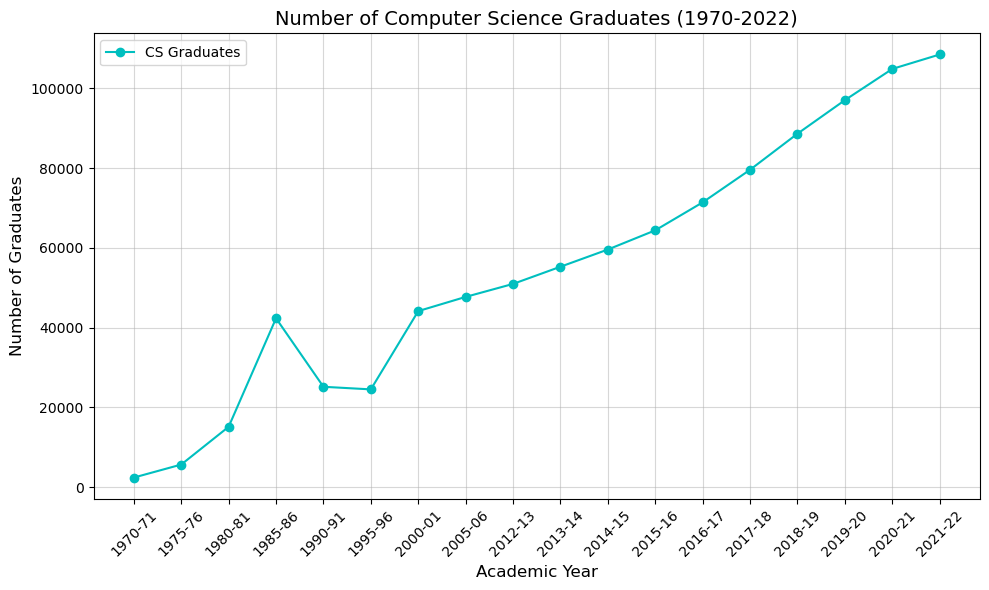

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(years, cs_graduates, marker='o', linestyle='-', color='c', label='CS Graduates')
plt.title('Number of Computer Science Graduates (1970-2022)', fontsize=14)
plt.xlabel('Academic Year', fontsize=12)
plt.ylabel('Number of Graduates', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(alpha=0.5)    
plt.legend()         
plt.tight_layout()       
plt.show()

##### Here, I filtered the dataset to include only the years 2017–2022 for two key reasons. 

First, the job listings data I found is only available starting in 2017, making it essential to align the scope of my analysis with this timeframe. 

Second, narrowing the dataset to these recent years allows me to focus on the rapid boom in computer science graduates and the growing difficulty of securing tech jobs during this period. 

##### This targeted approach enables me to explore my hypothesis more effectively by concentrating on the most relevant and recent trends in the data. The filtered data is visualized in a line graph to clearly illustrate these dynamics.



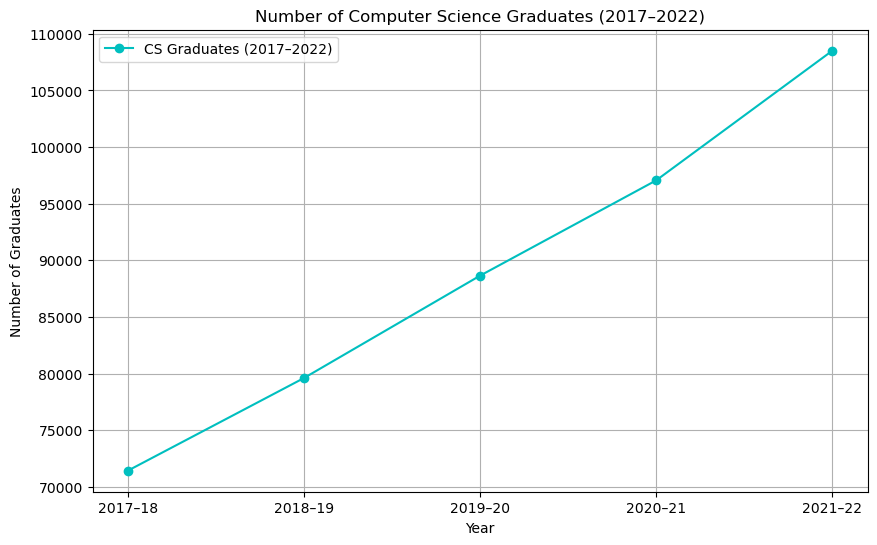

In [7]:
years_filtered = ['2017–18', '2018–19', '2019–20', '2020–21', '2021–22']  
cs_graduates_values = [71416, 79597, 88638, 97054, 108503]  

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(years_filtered, cs_graduates_values, marker='o', color='c', label='CS Graduates (2017–2022)')
plt.title("Number of Computer Science Graduates (2017–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Graduates")
plt.legend()
plt.grid()
plt.show()


##### Here I import the second dataset with number of tech jobs from 2017 onwards in America

In [8]:
employment_tech = pd.read_excel(
    'statistic_id1403635_tech-sector-employment-in-the-us-2017-2023.xlsx',
    sheet_name='Data',
    skiprows=5
)

print(employment_tech.head())


   Unnamed: 0   2017  8058855
0         NaN   2018  8295341
1         NaN   2019  8529329
2         NaN   2020  8606573
3         NaN   2021  8869967
4         NaN  2022*  9156390


##### Following this, I noticed that there is an asterisk in row 4.

I refine the dataset by renaming columns for better readability and addressing formatting issues in the 'Year' column. I start by assigning meaningful column names: 'Unnamed' (placeholder), 'Year', and 'Jobs'.

Then, I clean up the 'Year' column to remove any unwanted characters, such as the asterisk (''), which appears in some entries (e.g., 2022). By converting the 'Year' column into integers after removing the asterisks, I ensure the data is properly formatted for numerical analysis and visualization. These steps prepare the dataset for seamless use in subsequent analysis.



In [9]:
employment_tech.columns = ['Unnamed', 'Year', 'Jobs']
employment_tech['Year'] = employment_tech['Year'].astype(str).str.replace('*', '', regex=False).astype(int)


##### In this step, I use pd.to_numeric() to convert the 'Jobs' column into a numeric data type. This is particularly useful for cleaning the data and ensuring that all entries in this column are properly formatted as numbers. By setting errors='coerce', I handle any non-numeric values by replacing them with NaN (Not a Number), which prevents errors during calculations or analysis. 

In [10]:
employment_tech['Jobs'] = pd.to_numeric(employment_tech['Jobs'], errors='coerce')



##### In the next step, I plot a line graph to visualize the trends in tech sector employment in the U.S. from 2017 to 2023. Using Matplotlib, I map the years ('Year' column) on the x-axis and the corresponding number of tech jobs ('Jobs' column) on the y-axis.

By visualizing the trends, I aim to uncover patterns or anomalies in graduation rates and correlate them with industry developments.

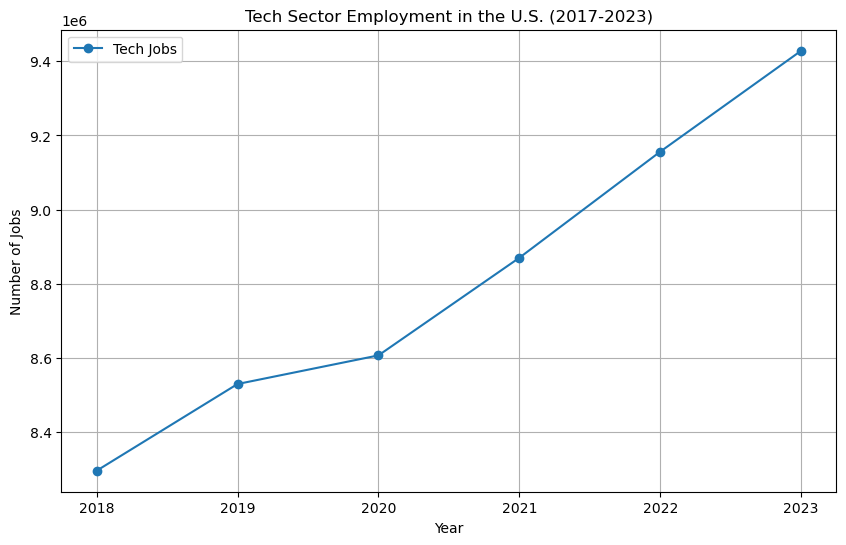

In [11]:
# Clean and format the tech employment dataset for analysis
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(employment_tech['Year'], employment_tech['Jobs'], marker='o', label='Tech Jobs')
plt.title('Tech Sector Employment in the U.S. (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.xticks(employment_tech['Year'])
plt.legend()
plt.grid()
plt.show()

##### In this step, I combine the two plots—tech sector employment and computer science graduation rates—into a single visualization to examine their correlation. My hypothesis is that recent trends might reveal either a decrease in tech job availability or a disproportionately high increase in graduation rates, suggesting potential oversaturation in the job market. 

##### However, I am surprised that this is not immediately apparent in the combined graphs. This raises the question of whether the way I am displaying the data might be obscuring the relationship. ##### 

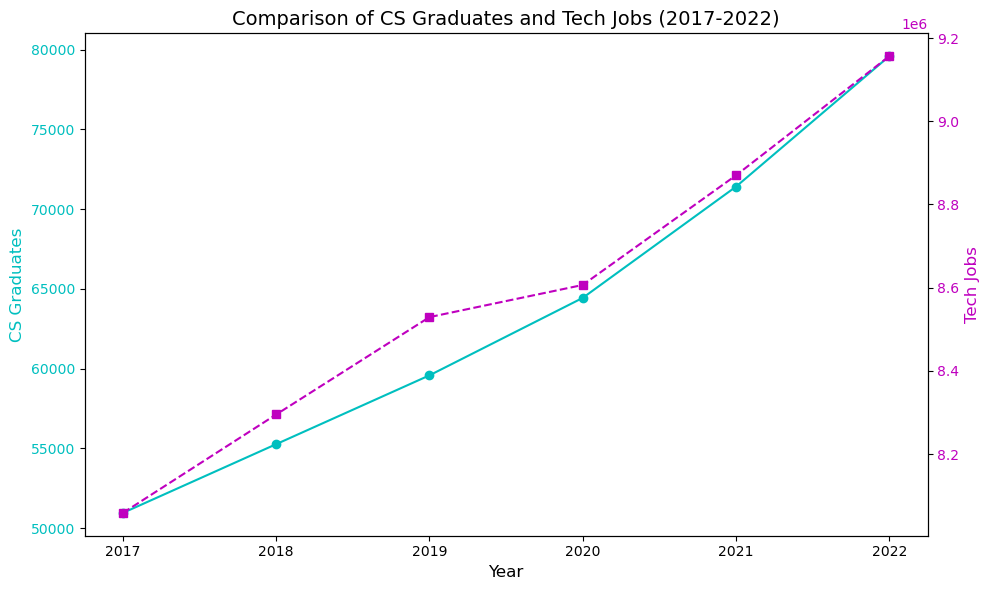

In [12]:
import matplotlib.pyplot as plt

# Prepare the data
years = ['2017', '2018', '2019', '2020', '2021', '2022']
cs_graduates = [50961, 55271, 59586, 64442, 71416, 79597]
tech_jobs = [8058855, 8295341, 8529329, 8606573, 8869967, 9156390]

# Create the figure and first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot CS graduates on the first y-axis
color = 'c'
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('CS Graduates', color=color, fontsize=12)
ax1.plot(years, cs_graduates, marker='o', color=color, label='CS Graduates')
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis
ax2 = ax1.twinx()
color = 'm'
ax2.set_ylabel('Tech Jobs', color=color, fontsize=12)
ax2.plot(years, tech_jobs, marker='s', linestyle='--', color=color, label='Tech Jobs')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and grid
plt.title('Comparison of CS Graduates and Tech Jobs (2017-2022)', fontsize=14)
fig.tight_layout()

# Show the plot
plt.show()



To address this, I plan to adjust the visualization by calculating and plotting the cumulative growth for both tech jobs and graduation rates over time. By normalizing the data to their respective 2017 values, I can directly compare the relative growth of each metric. This approach provides a clearer picture of how these trends align or diverge over the observed period, making it easier to identify disparities in their growth trajectories.

This step combines data on graduates and job trends to test the hypothesis more directly. The visualization aims to highlight whether graduate supply aligns with or exceeds job market demand.

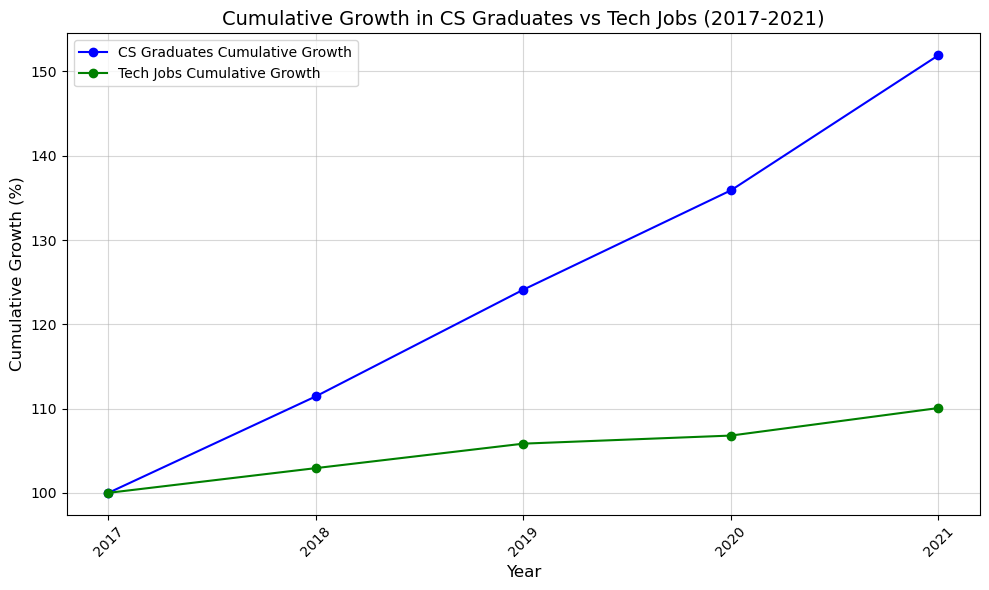

In [13]:
cs_years = ['2017', '2018', '2019', '2020', '2021']
cs_graduates = [71416, 79597, 88638, 97054, 108503]
tech_jobs = [8058855, 8295341, 8529329, 8606573, 8869967]

data = pd.DataFrame({
    'Year': cs_years,
    'CS_Graduates': cs_graduates,
    'Tech_Jobs': tech_jobs
})

data['CS_Graduates_Cumulative_Growth'] = (data['CS_Graduates'] / data['CS_Graduates'].iloc[0]) * 100
data['Tech_Jobs_Cumulative_Growth'] = (data['Tech_Jobs'] / data['Tech_Jobs'].iloc[0]) * 100

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['CS_Graduates_Cumulative_Growth'], marker='o', label='CS Graduates Cumulative Growth', color='blue')
plt.plot(data['Year'], data['Tech_Jobs_Cumulative_Growth'], marker='o', label='Tech Jobs Cumulative Growth', color='green')
plt.title("Cumulative Growth in CS Graduates vs Tech Jobs (2017-2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cumulative Growth (%)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



These visualizations reveal a noticeable difference in the cumulative growth of computer science graduates and tech jobs between 2017 and 2021. While the number of CS graduates has grown significantly—reaching nearly 150% of its 2017 baseline—the growth in tech jobs has been much slower, rising to only around 110%. This divergence suggests that the supply of graduates may be outpacing the growth in demand, pointing to potential oversaturation in the job market.

This analysis highlights the value of looking at cumulative growth to better understand these trends. While the tech sector continues to expand, this data raises important questions about whether the market can absorb the increasing number of graduates. It also makes me wonder how specific factors, like skill alignment, geographic distribution of jobs, or changes in industry priorities, might explain this mismatch.

To build on this, I could explore other metrics, such as the types of roles being created within the tech sector, starting salaries, or even underemployment rates among graduates. It would also be helpful to see how these trends play out over a longer time frame or across different regions to get a more complete picture of the market dynamics.

On a personal note, experimenting with different ways of graphing the data has been especially helpful in understanding how different ways of presenting data can highlight or obscure patterns


### Reflections and Next Steps

This project provided valuable insights into the relationship between the supply of computer science graduates and demand in the tech sector. It also proved my initial hypothesis.  

But while the visualizations reveal some interesting trends, such as the rapid growth in CS graduates compared to slower job growth, further analysis is needed to explore:
- Geographic variations in job availability and graduate supply.
- The types of roles being created in the tech sector and their alignment with graduates' skills.
- External factors, such as economic conditions or immigration policies, impacting the job market.

Future work could incorporate additional datasets, such as salary trends or underemployment rates, to create a more comprehensive picture. This analysis has also highlighted the importance of normalizing data for better comparability, a lesson I plan to apply in future projects.